# 1. Load the dataset
# 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. 
# 3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? 
# 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
# 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. 
# 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. 
# 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?  
# 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? 

In [0]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import average_precision_score,confusion_matrix,f1_score,recall_score,roc_auc_score,precision_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [2]:
data_parkinson_disease=pd.read_csv("parkinsons.data")
data_parkinson_disease.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**Exploratory Data Analysis**

In [3]:
data_parkinson_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [4]:
data_parkinson_disease.shape

(195, 24)

In [5]:
data_parkinson_disease.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
data_parkinson_disease.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
data_parkinson_disease.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [8]:
data_parkinson_disease.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [9]:
data_parkinson_disease.apply(lambda x: len(x.unique()))

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

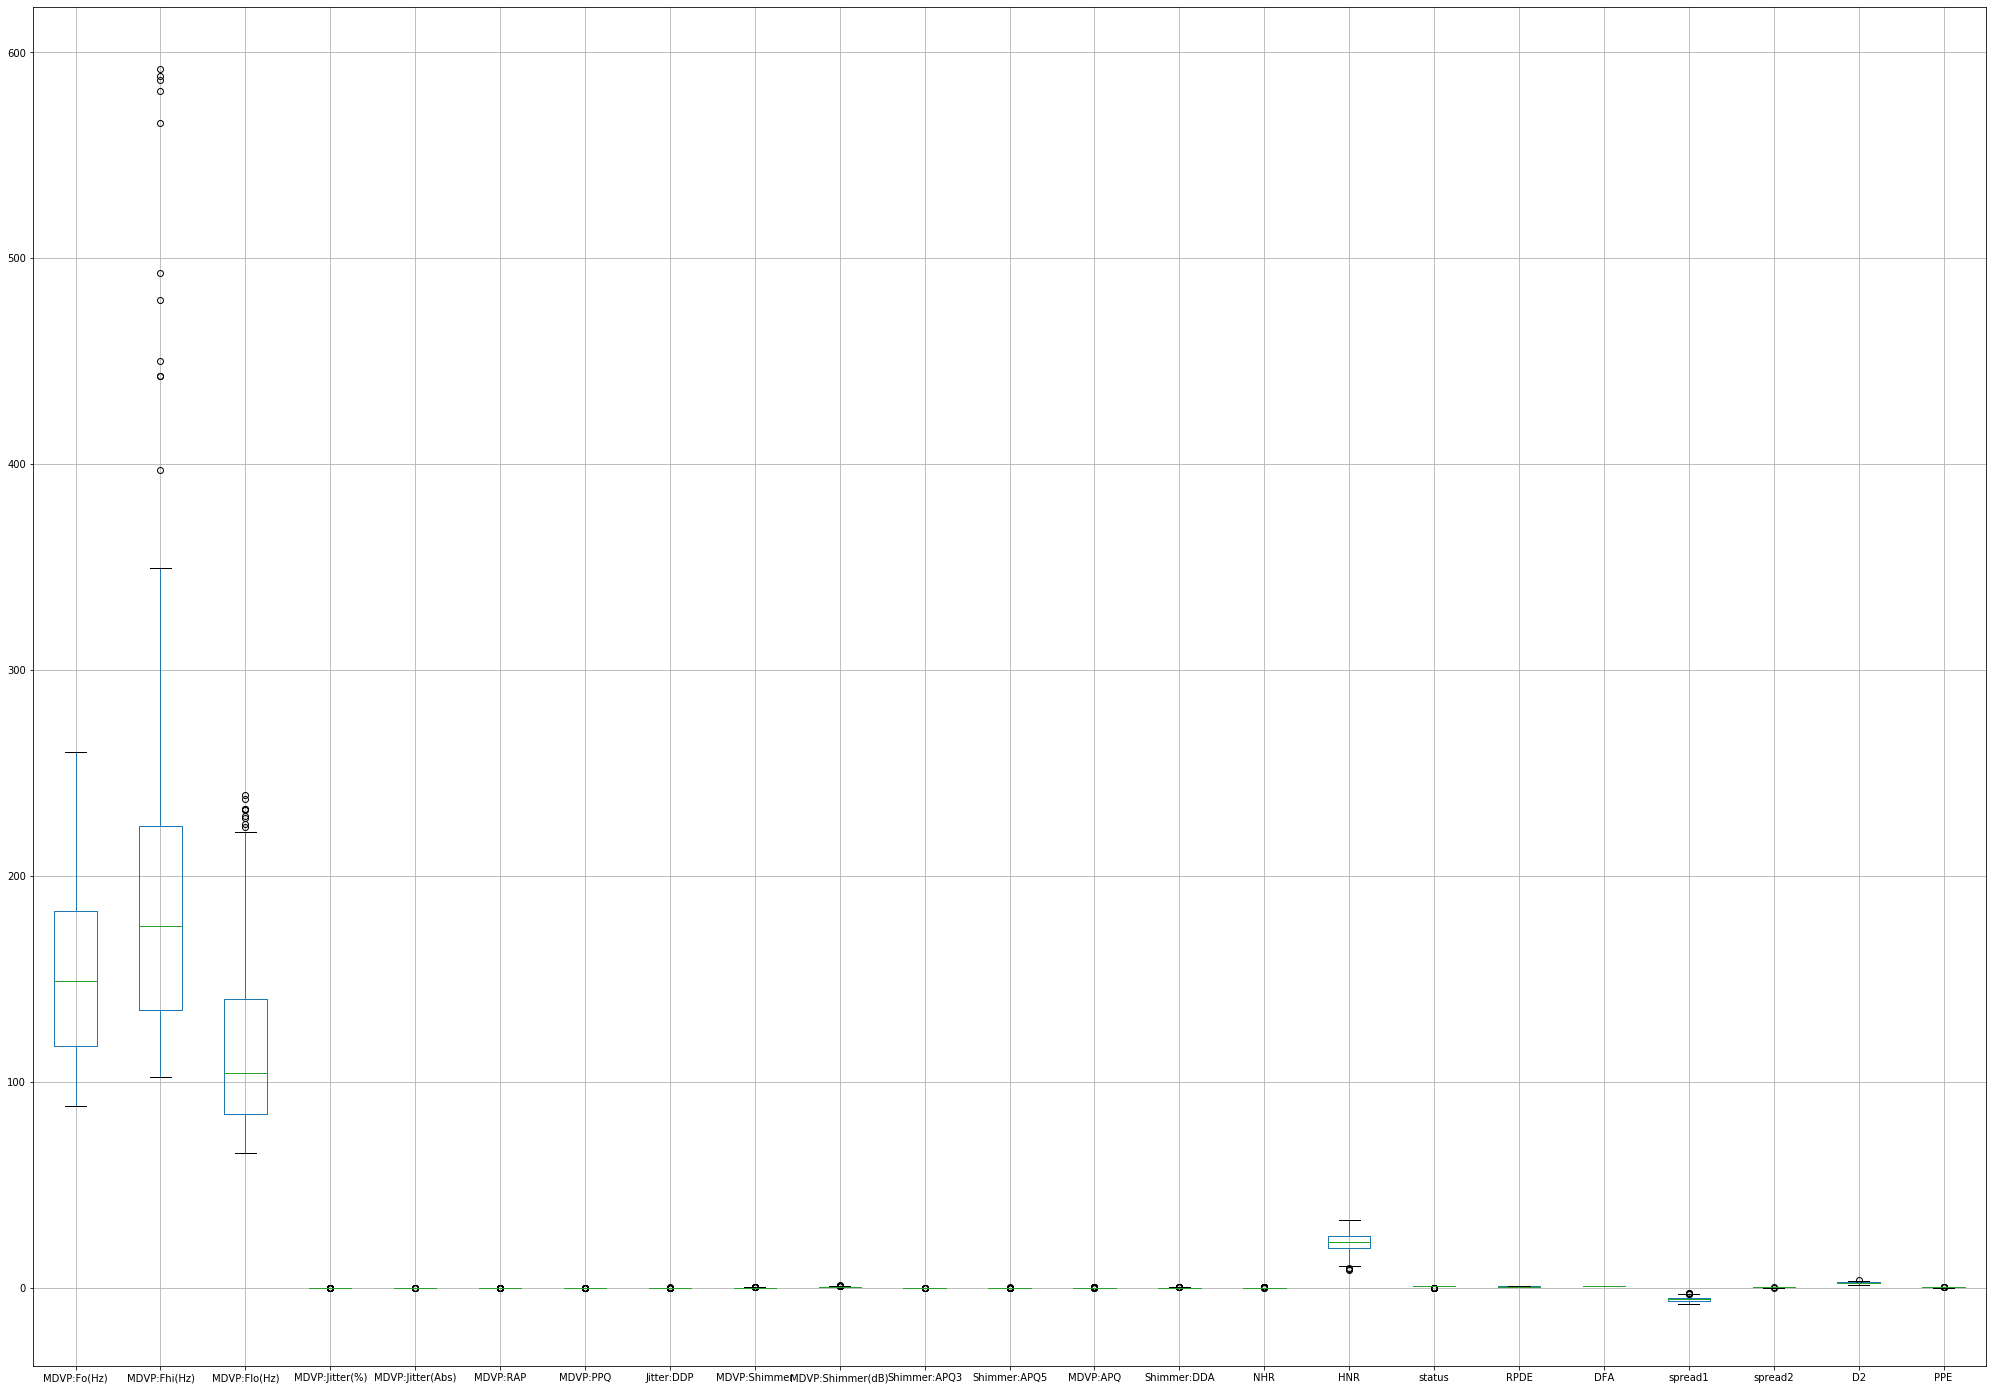

In [10]:
data_parkinson_disease.boxplot(figsize=(35,25))

**From the above box plots, we observe that there are less outliers. So, the model will not be affected by outliers.**

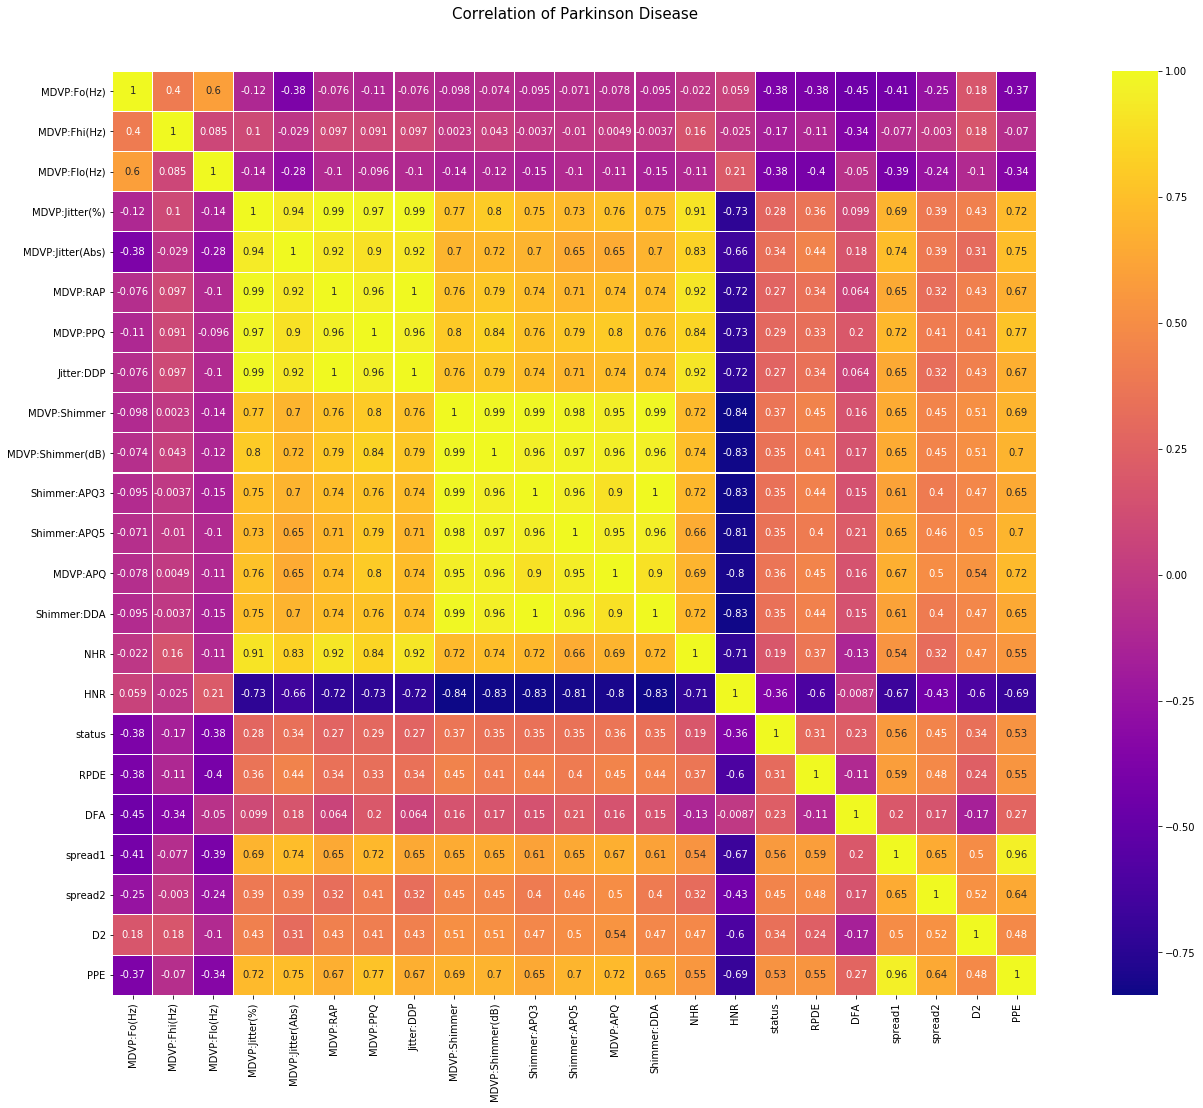

In [11]:

colormap = plt.cm.plasma
plt.figure(figsize=(27,17))
plt.title('Correlation of Parkinson Disease', y=1.05, size=15)
sns.heatmap(data_parkinson_disease.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, 
            linecolor='white', annot=True)



1. **Shimmer DDA have high correlation with MDVP:Shimmer, MDVP:Shimmer(db), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ**
2. **MDVP:APQ have high correlation with Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(db), Shimmer:APQ3, Shimmer:APQ5, Shimmer:DDA**
3. **MDVP:Jitter(%) have high correlation with MDVP:Jitter(Abs), MDVP:PPQ, Jitter:DDP, MDVP:RAP and NHR**
4. M**DVP:Jitter(ABS) have high correlation with MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ, Jitter:DDP**
5. **MDVP:RAP have high correlation with MDVP:Jitter(%), MDVP:Jitter(ABS), MDVP:PPQ, Jitter:DDP, NHR**

6. **Shimmer DDA and Shimmer APQ3 have correlation as 1**
7. **MDVP:RAP and Jitter DDP have correlation as 1**
7. **MDVP:fho(Hz) have low correlation with MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:Apq5, MDVP:APQ, Shimmer:DDA**
**Most of the column that have Shimmer as a part of column name are highly correlated to each other**

In [12]:
data_parkinson_disease['status'].value_counts().sort_index()

0     48
1    147
Name: status, dtype: int64

**Most are having Parkinson disease. The ratio is almost 1:3 in favor of status 1. So, the model's ability to predict status 1 will be better than predicting status 0.**

In [13]:
parkinson_df = pd.DataFrame(data_parkinson_disease.status.value_counts())
parkinson_df['Count'] = parkinson_df.index
parkinson_df


,status,Count
1,147,1
0,48,0


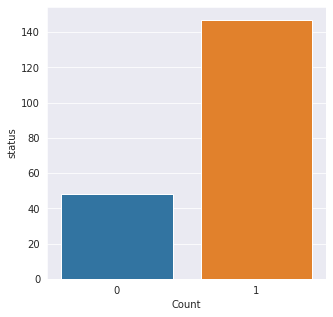

In [14]:
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (5, 5)})
sns.barplot(x = 'Count', y = 'status', data =parkinson_df )

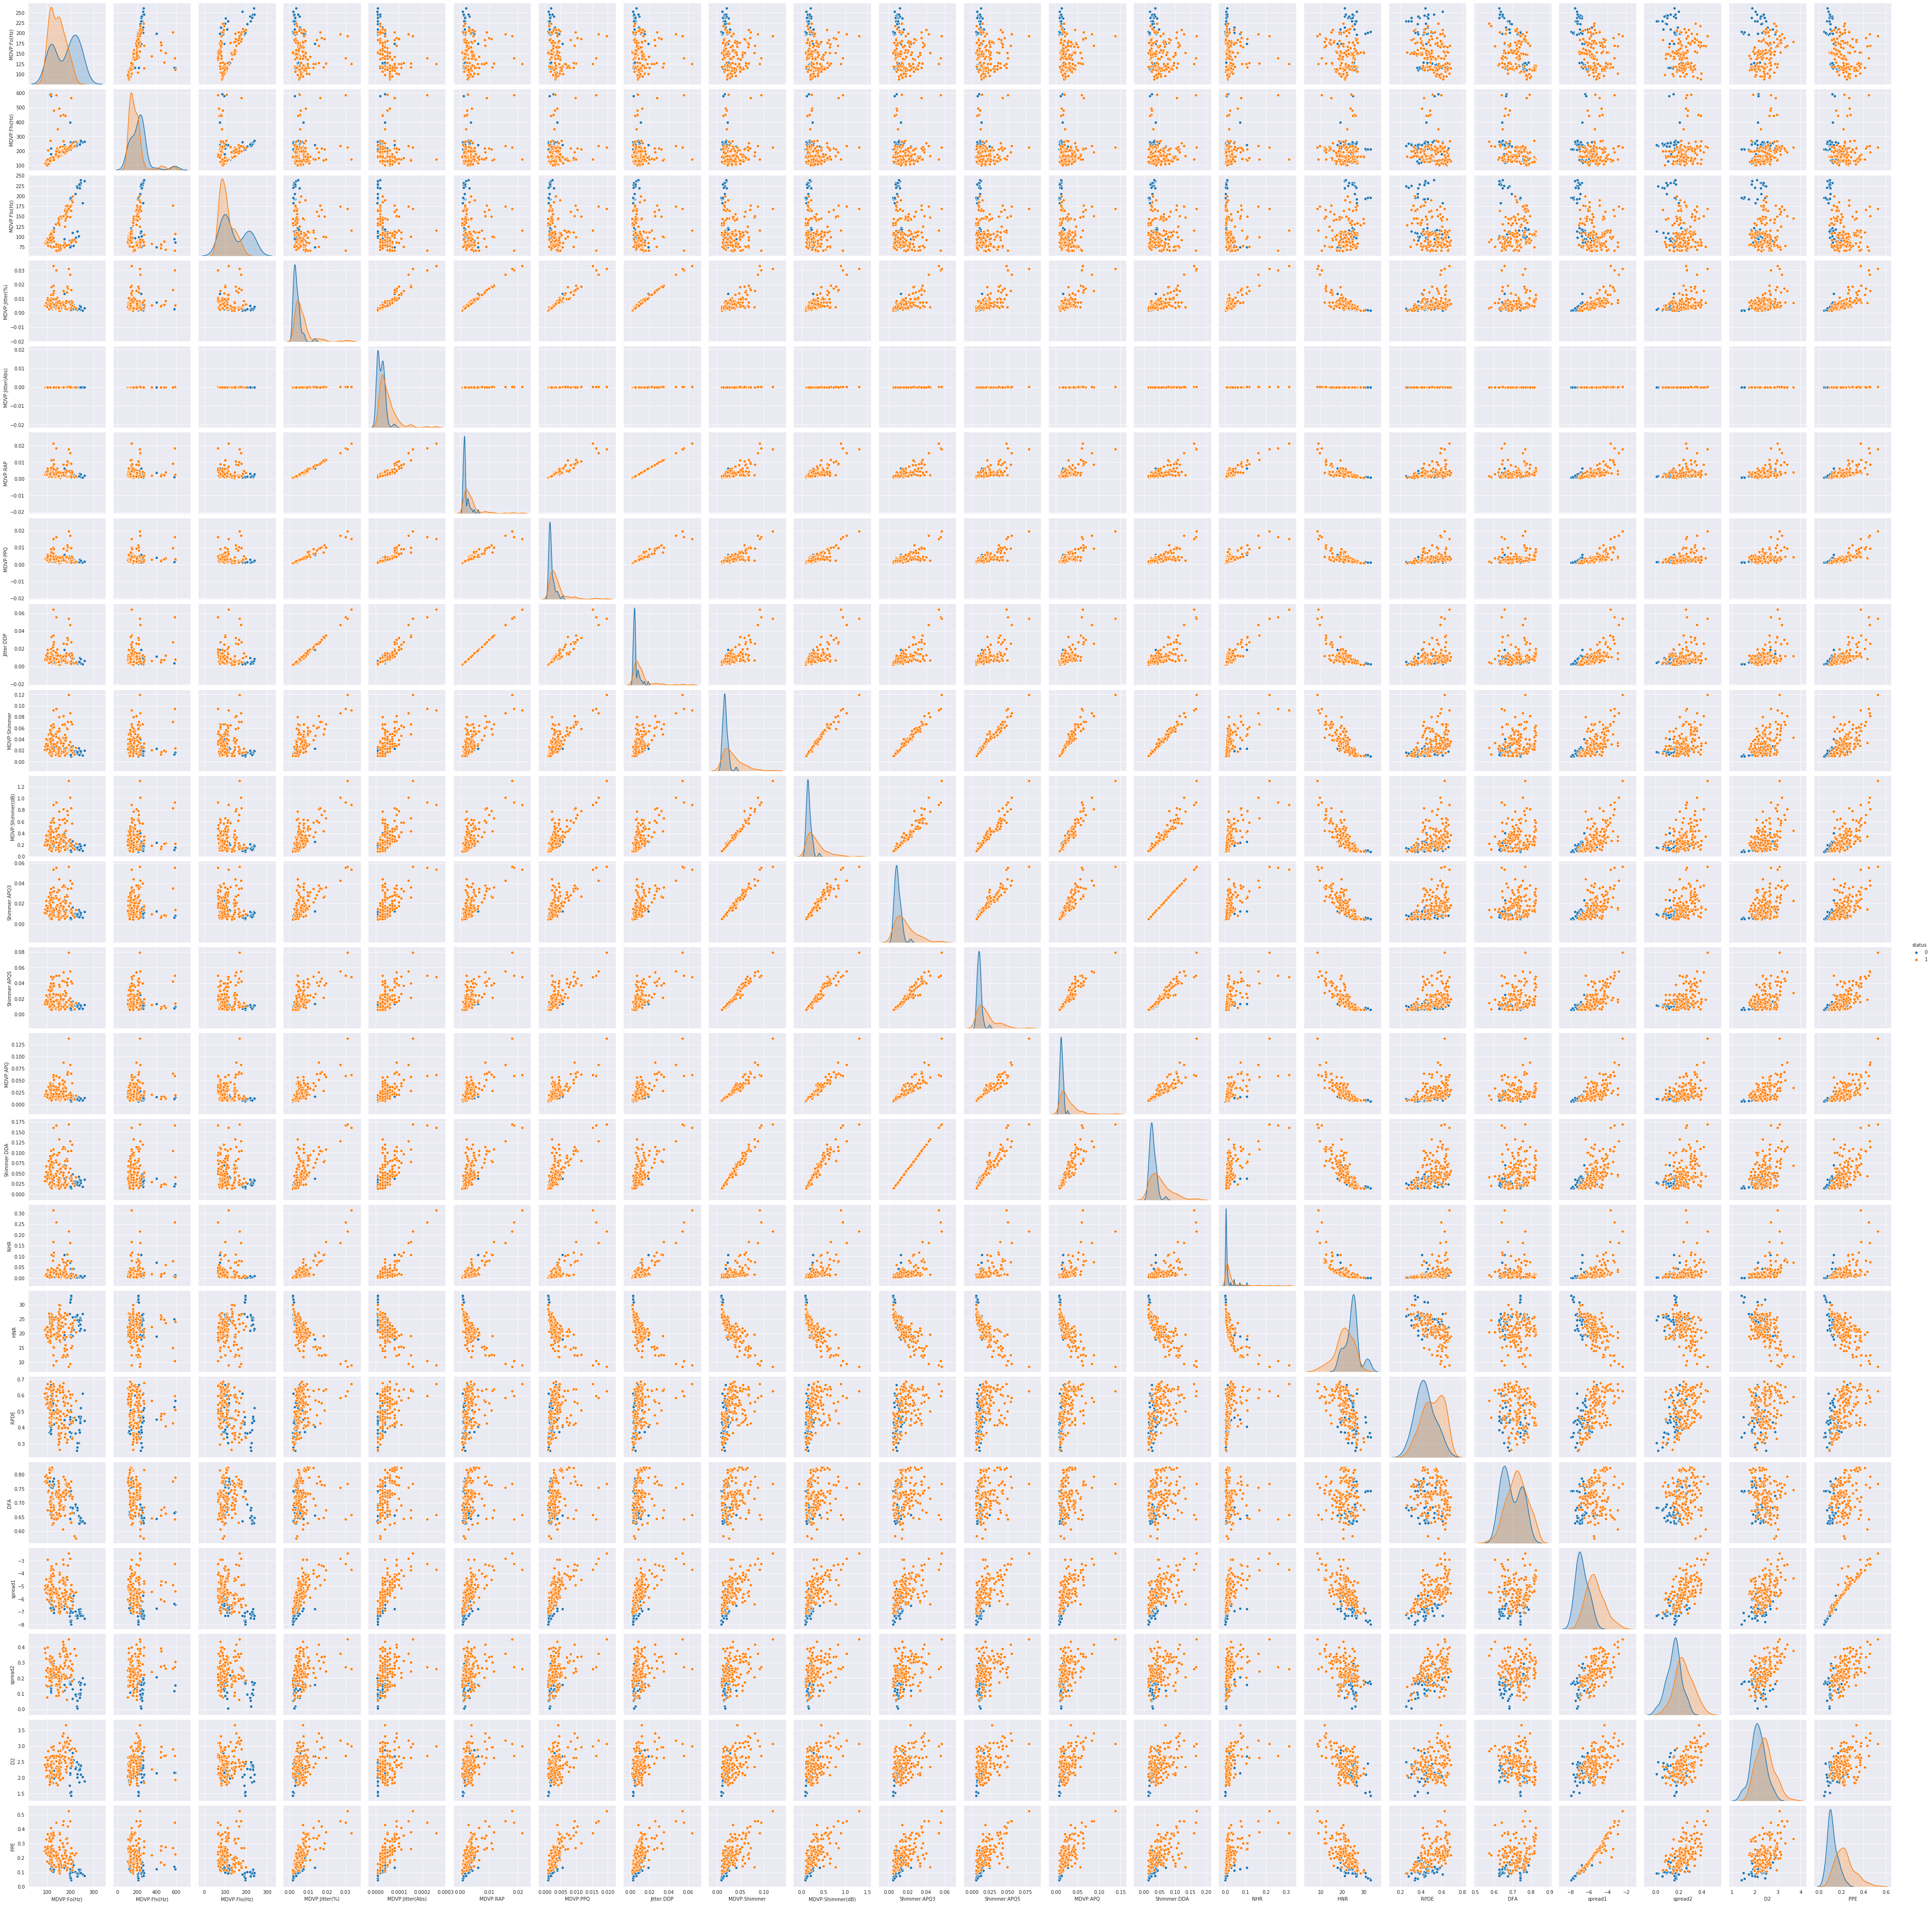

In [37]:
sns.pairplot(data=data_parkinson_disease, hue='status', diag_kind='kde')


1. **Shimmer DDA have high correlation with MDVP:Shimmer, MDVP:Shimmer(db), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ**
2. **MDVP:APQ have high correlation with Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(db), Shimmer:APQ3, Shimmer:APQ5, Shimmer:DDA**
3. **MDVP:Jitter(%) have high correlation with MDVP:Jitter(Abs), MDVP:PPQ, Jitter:DDP, MDVP:RAP and NHR**
4. **MDVP:Jitter(ABS) have high correlation with MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ, Jitter:DDP**
5. **MDVP:RAP have high correlation with MDVP:Jitter(%), MDVP:Jitter(ABS), MDVP:PPQ, Jitter:DDP, NHR**

6. **Shimmer DDA and Shimmer APQ3 have correlation as 1,** 
7. **MDVP:RAP and Jitter DDP have correlation as 1**
8. **Shimmer DDA, NHR, MDVP.Jitter(Abs), MDVP.APQ, MDVP.PPQ, MDVP.RAP, MDVP.Shimmer, Shimmer(APQ3), Shimmer(APQ5) are rightly skewed**
9. **MDVP:fho(Hz) have low correlation with MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:Apq5, MDVP:APQ, Shimmer:DDA**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf813bb2b0>,
      dtype=object)

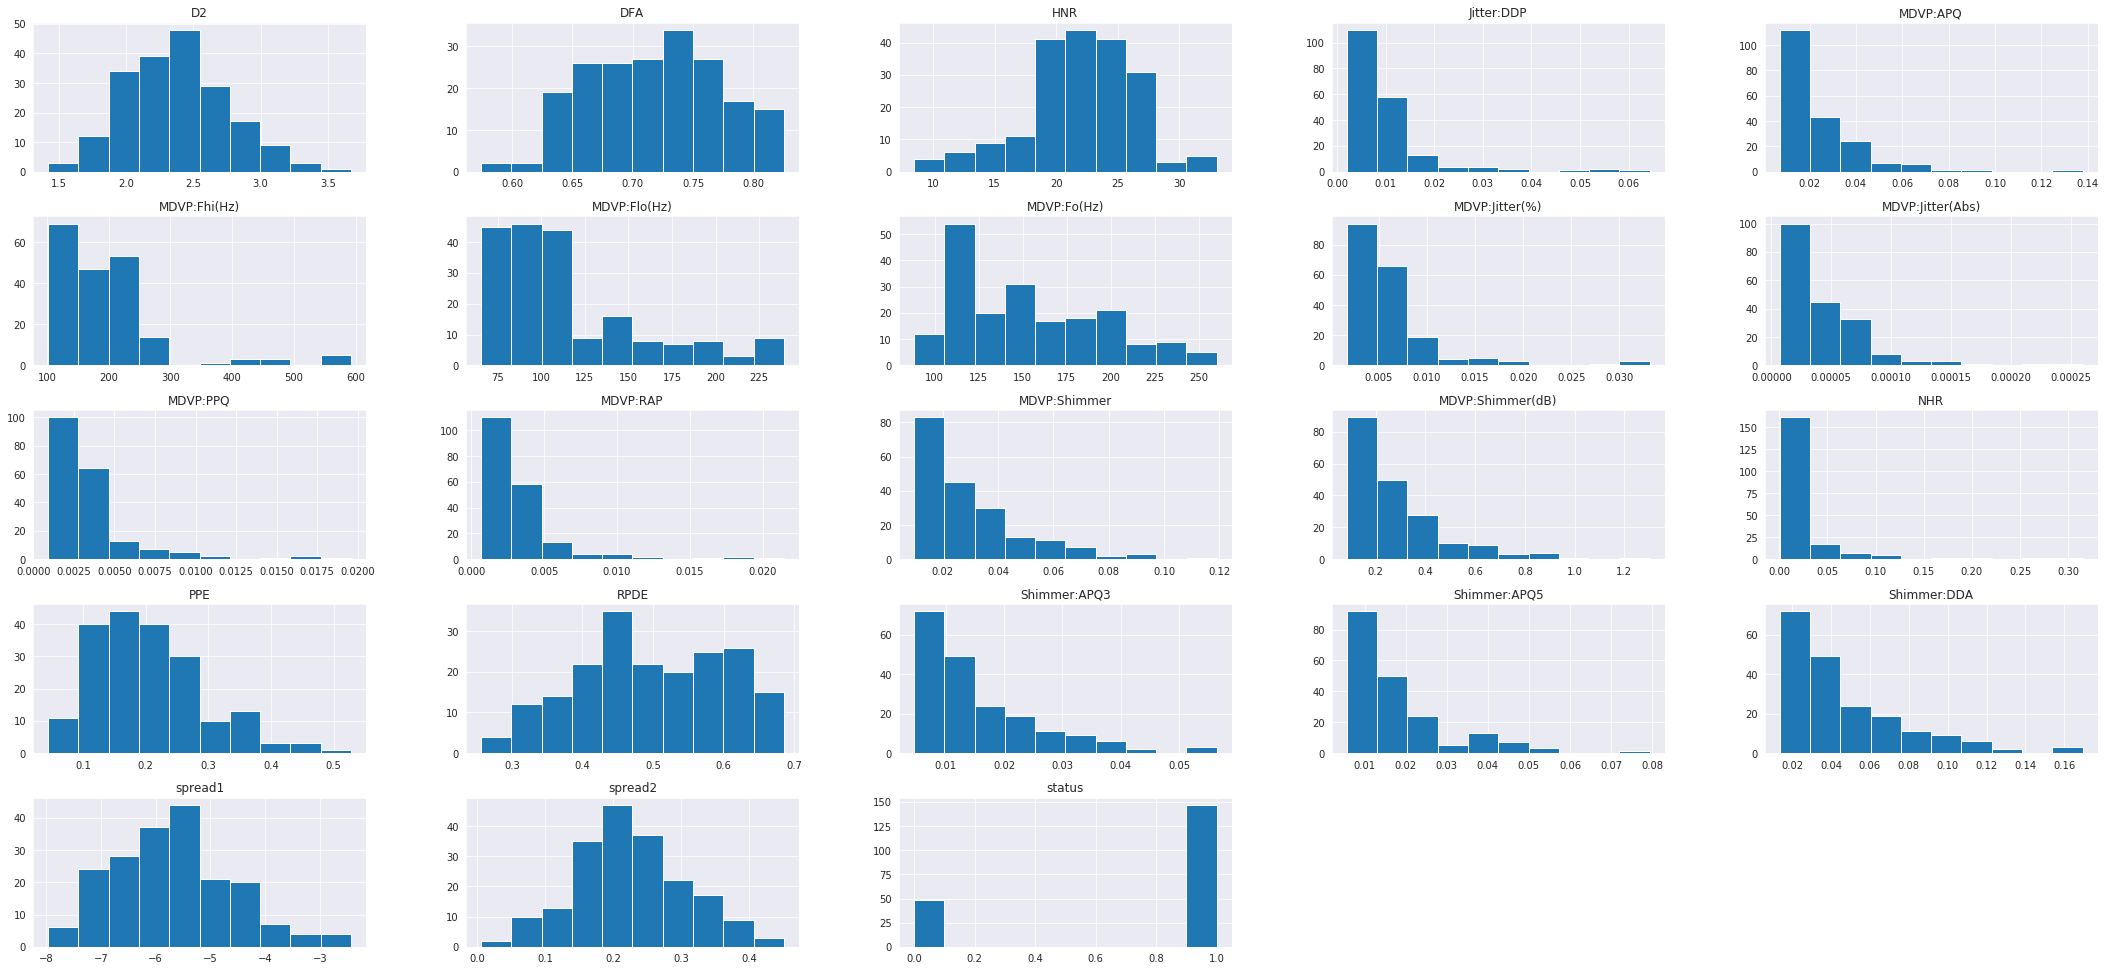

In [16]:

data_parkinson_disease.hist(figsize=(37,17))

### **Create the model using “entropy” method of reducing the entropy and fit it to training data.**

In [0]:
X = data_parkinson_disease.drop(["status", "name"], axis=1)
y = data_parkinson_disease["status"]

In [0]:
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(X)

In [0]:
test_size=0.30
seed=7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = seed)

In [0]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [21]:
  dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
test_pred = dt_model.predict(X_test)

In [23]:
dt_model.score(X_test , y_test)

0.8983050847457628

In [24]:
pd.crosstab(test_pred, y_test)

status,0,1
row_0,,
0,9,3
1,3,44


In [25]:
pd.DataFrame(data=[dt_model.score(X_train , y_train), accuracy_score(y_test, test_pred), recall_score(y_test,test_pred), precision_score(y_test, test_pred),
 f1_score(y_test,test_pred), roc_auc_score(y_test,test_pred),
 metrics.mean_absolute_error(y_test, test_pred),metrics.mean_squared_error(y_test, test_pred)
 ,np.sqrt(metrics.mean_squared_error(y_test, test_pred)) ], index=["Train Accuracy Score", "Accuracy Score", "Recall Score", "Precision Score", "F1 Score", "ROC AUC Score","Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error"])

,0
Train Accuracy Score,1.000000
Accuracy Score,0.898305
Recall Score,0.936170
Precision Score,0.936170
F1 Score,0.936170
ROC AUC Score,0.843085
Mean Absolute Error,0.101695
Mean Squared Error,0.101695
Root Mean Squared Error,0.318896


In [26]:
print(confusion_matrix(y_test,test_pred))


[[ 9  3]
 [ 3 44]]


**Just checking the classification report to be sure**

In [27]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.94      0.94      0.94        47

    accuracy                           0.90        59
   macro avg       0.84      0.84      0.84        59
weighted avg       0.90      0.90      0.90        59



### **Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?**

In [28]:
regularization_model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf= 5, max_depth=10)
regularization_model.fit(X_train, y_train)
regularization_pred = regularization_model.predict(X_test)

pd.DataFrame(data=[regularization_model.score(X_train, y_train), accuracy_score(y_test, regularization_pred), recall_score(y_test,regularization_pred), precision_score(y_test, regularization_pred),
 f1_score(y_test,regularization_pred), roc_auc_score(y_test,regularization_pred),
 metrics.mean_absolute_error(y_test, regularization_pred),metrics.mean_squared_error(y_test, regularization_pred)
 ,np.sqrt(metrics.mean_squared_error(y_test, regularization_pred)) ], index=["Train Score", "Accuracy Score", "Recall Score", "Precision Score","F1 Score", "ROC AUC Score","Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error"])

,0
Train Score,0.970588
Accuracy Score,0.915254
Recall Score,0.957447
Precision Score,0.937500
F1 Score,0.947368
ROC AUC Score,0.853723
Mean Absolute Error,0.084746
Mean Squared Error,0.084746
Root Mean Squared Error,0.291111


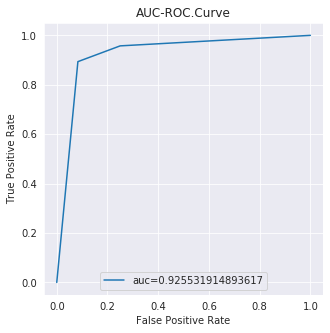

array([0.        , 0.89361702, 0.95744681, 1.        ])

In [29]:
y_pred_proba=regularization_model.predict_proba(X_test)[::,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
auc=roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC.Curve')

plt.legend (loc=8)
plt.show()
tpr

### **Regularization helps in many ways. One straight-forward way is to limit the maximum allowable tree depth. The common way for RF classifiers to overfit is when they get too deep. Thus you can use the maximum depth parameter as the regularization parameter - making it smaller will reduce the overfitting and introduce bias, increasing it will do the opposite.**

### **Implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result**

**Implementing Decision tree without any Regularization technique**

In [30]:
rfcl = RandomForestClassifier()
rfcl = rfcl.fit(X_train, y_train)
randomForest_pred = rfcl.predict(X_test)
pd.DataFrame(data=[rfcl.score(X_train, y_train), accuracy_score(y_test, randomForest_pred), recall_score(y_test,randomForest_pred), precision_score(y_test, randomForest_pred),
 f1_score(y_test,randomForest_pred), roc_auc_score(y_test,randomForest_pred),
 metrics.mean_absolute_error(y_test, randomForest_pred),metrics.mean_squared_error(y_test, randomForest_pred)
 ,np.sqrt(metrics.mean_squared_error(y_test, randomForest_pred)) ], index=["Train Accuracy","Test Accuracy Score", "Recall Score", "Precision Score", "F1 Score", "ROC AUC Score","Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error"])

,0
Train Accuracy,1.000000
Test Accuracy Score,0.898305
Recall Score,0.957447
Precision Score,0.918367
F1 Score,0.937500
ROC AUC Score,0.812057
Mean Absolute Error,0.101695
Mean Squared Error,0.101695
Root Mean Squared Error,0.318896


**Implementing Decision tree without regularizing technique provided the above accuracy, precision, recall, f1 score etc. Now lets use regularization technique and see if the accuracy increases**

In [31]:
rfclRegularized = RandomForestClassifier(random_state=0, n_estimators = 10, min_samples_leaf=1, max_depth=5, max_features=0.25, max_leaf_nodes=20)
rfclRegularized = rfclRegularized.fit(X_train, y_train)
randomForest_pred = rfclRegularized.predict(X_test)
pd.DataFrame(data=[rfclRegularized.score(X_train, y_train), accuracy_score(y_test, randomForest_pred), recall_score(y_test,randomForest_pred), precision_score(y_test, randomForest_pred),
 f1_score(y_test,randomForest_pred), roc_auc_score(y_test,randomForest_pred),
 metrics.mean_absolute_error(y_test, randomForest_pred),metrics.mean_squared_error(y_test, randomForest_pred)
 ,np.sqrt(metrics.mean_squared_error(y_test, randomForest_pred)) ], index=["Train Accuracy","Test Accuracy Score", "Recall Score", "Precision Score", "F1 Score", "ROC AUC Score","Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error"])

,0
Train Accuracy,0.992647
Test Accuracy Score,0.915254
Recall Score,0.978723
Precision Score,0.920000
F1 Score,0.948454
ROC AUC Score,0.822695
Mean Absolute Error,0.084746
Mean Squared Error,0.084746
Root Mean Squared Error,0.291111


**As per above accuracy, we have taken number of trees as 10 for which required accuracy is achieved for test data. Now I would try Grid Search to find the best possible value and will check the number of trees and will see if the accuracy is increased or not. But before that, lets try taking random number of trees and see if the accuracy increases or not**

In [32]:
n_estimators=[10,20,30,40,50,60,70,80,90,100,200]
for i in n_estimators:
  rfcl2 = RandomForestClassifier(random_state=0, n_estimators = i, max_depth=5, max_features=0.25, max_leaf_nodes=20)
  rfcl2 = rfcl2.fit(X_train, y_train)
  randomForest_pred2 = rfcl2.predict(X_test)
  print("Training accuracy when number of trees are", i, "then accuracy equal to", rfcl2.score(X_test, y_test))
  

Training accuracy when number of trees are 10 then accuracy equal to 0.9152542372881356
Training accuracy when number of trees are 20 then accuracy equal to 0.8813559322033898
Training accuracy when number of trees are 30 then accuracy equal to 0.8983050847457628
Training accuracy when number of trees are 40 then accuracy equal to 0.8983050847457628
Training accuracy when number of trees are 50 then accuracy equal to 0.8983050847457628
Training accuracy when number of trees are 60 then accuracy equal to 0.8983050847457628
Training accuracy when number of trees are 70 then accuracy equal to 0.8813559322033898
Training accuracy when number of trees are 80 then accuracy equal to 0.8813559322033898
Training accuracy when number of trees are 90 then accuracy equal to 0.8813559322033898
Training accuracy when number of trees are 100 then accuracy equal to 0.8813559322033898
Training accuracy when number of trees are 200 then accuracy equal to 0.8983050847457628


**As per above fetched accuracy via different n_estimators values, we have seen that n_estimators value as 10 have achieved the higher accuracy.**

**Checking with Grid Search to find the best possible value of RandomForestClassifier**

In [33]:
grid=GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators' : np.arange(1, 20), 'random_state':np.arange(0,2),
                                                                  'min_samples_leaf':np.arange(1,5),
                                                                  'max_depth': np.arange(1,5)})
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 4, 'random_state': 1}

In [34]:
rfclRegularized = RandomForestClassifier(min_samples_leaf=2, random_state=1, n_estimators = 4, max_depth=4)
rfclRegularized = rfclRegularized.fit(X_train, y_train)
randomForest_pred = rfclRegularized.predict(X_test)
pd.DataFrame(data=[rfclRegularized.score(X_train, y_train), accuracy_score(y_test, randomForest_pred), recall_score(y_test,randomForest_pred), precision_score(y_test, randomForest_pred),
 f1_score(y_test,randomForest_pred), roc_auc_score(y_test,randomForest_pred),
 metrics.mean_absolute_error(y_test, randomForest_pred),metrics.mean_squared_error(y_test, randomForest_pred)
 ,np.sqrt(metrics.mean_squared_error(y_test, randomForest_pred)) ], index=["Train Accuracy","Test Accuracy Score", "Recall Score", "Precision Score", "F1 Score", "ROC AUC Score","Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error"])

,0
Train Accuracy,0.963235
Test Accuracy Score,0.915254
Recall Score,1.000000
Precision Score,0.903846
F1 Score,0.949495
ROC AUC Score,0.791667
Mean Absolute Error,0.084746
Mean Squared Error,0.084746
Root Mean Squared Error,0.291111


**As per the above calculation on using different number of trees we see that the optimal number of tree is 4 for which we have received more accuracy.**

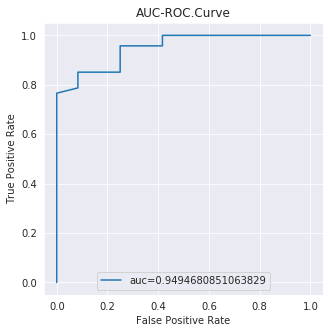

array([0.        , 0.23404255, 0.38297872, 0.4893617 , 0.5106383 ,
       0.59574468, 0.65957447, 0.74468085, 0.76595745, 0.78723404,
       0.85106383, 0.85106383, 0.87234043, 0.91489362, 0.95744681,
       0.95744681, 1.        , 1.        , 1.        , 1.        ])

In [35]:
y_pred_probab=rfcl.predict_proba(X_test)[::,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_probab)
auc=roc_auc_score(y_test,y_pred_probab)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC.Curve')

plt.legend (loc=8)
plt.show()
tpr

In [36]:
print(confusion_matrix(y_test,test_pred))

[[ 9  3]
 [ 3 44]]


# **SUMMARY:**

1. **We saw that before and after regularization, there was active increase in the accuracy.**
2. **When used DecisionTreeClassifier without regularization accuracy was okay. However, when regularization was used, there was active increase in the accuracy. Same case goes for Random forest, when regularization was used there was active increase in the accuracy as compared to not used.**
3.**There was less outliers. so handling outliers was not necessary**
4. **High correlation was found between certain columns**
5. **For Regularization, the common way for RF classifiers to overfit is when they get too deep. Thus you can use the maximum depth parameter as the regularization parameter - making it smaller will reduce the overfitting and introduce bias, increasing it will do the opposite**